# Advanced Exploratory Data Analysis: Causal Structure Discovery
Author: Eduardo Perez Denadai

### references

* https://www.datavis.ca/papers/corrgram.pdf
* http://videolectures.net/gpip06_mackay_gpb/
* https://www.cs.cmu.edu/~epxing/Class/10708-14/lectures/lecture10-NetworkLearning.pdf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_diabetes, fetch_california_housing
from module.partial_correlations import PartialCorrelations

# 1. California Housing Prices

## Load Dataset

In [3]:
df = fetch_california_housing(return_X_y=False, as_frame=True)
df["data"]["target"] = df["target"]

## Center Dataset

In [4]:
X = df["data"].copy()
# X = (X-X.mean(axis=0))/X.std(axis=0)

In [5]:
names = X.columns.tolist()

In [6]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [7]:
# norm = QuantileTransformer(n_quantiles=10, output_distribution="normal")
norm = PowerTransformer(method='yeo-johnson', standardize=True)
X = pd.DataFrame(data=norm.fit_transform(X), columns=names)

# fit model with default params

In [8]:
model = PartialCorrelations()
model.fit(X)

PartialCorrelations(edge_model=EmpiricalCovariance())

In [9]:
# dense model of the CI matrix
model.compute_cond_ind_matrix(threshold=None)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,0.0,0.176188,0.663789,0.467458,0.069125,0.080793,0.039112,0.025416,0.614231
HouseAge,0.0,0.000000,0.043328,0.097100,0.307479,0.111457,0.126701,0.150412,0.155865
AveRooms,0.0,0.000000,0.000000,0.511741,0.190209,0.123166,0.280499,0.238015,0.139269
AveBedrms,0.0,0.000000,0.000000,0.000000,0.095457,0.147902,0.007953,0.029406,0.166426
Population,0.0,0.000000,0.000000,0.000000,0.000000,0.250255,0.035439,0.027061,0.043282
AveOccup,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.129957,0.082601,0.319013
Latitude,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.958740,0.445403
Longitude,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425268
target,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
# low threshold induce less sparsity or low confidence in the degree of independence
model.compute_cond_ind_matrix(threshold=0.1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,0,1,1,1,0,0,0,0,1
HouseAge,0,0,0,0,1,1,1,1,1
AveRooms,0,0,0,1,1,1,1,1,1
AveBedrms,0,0,0,0,0,1,0,0,1
Population,0,0,0,0,0,1,0,0,0
AveOccup,0,0,0,0,0,0,1,0,1
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
target,0,0,0,0,0,0,0,0,0


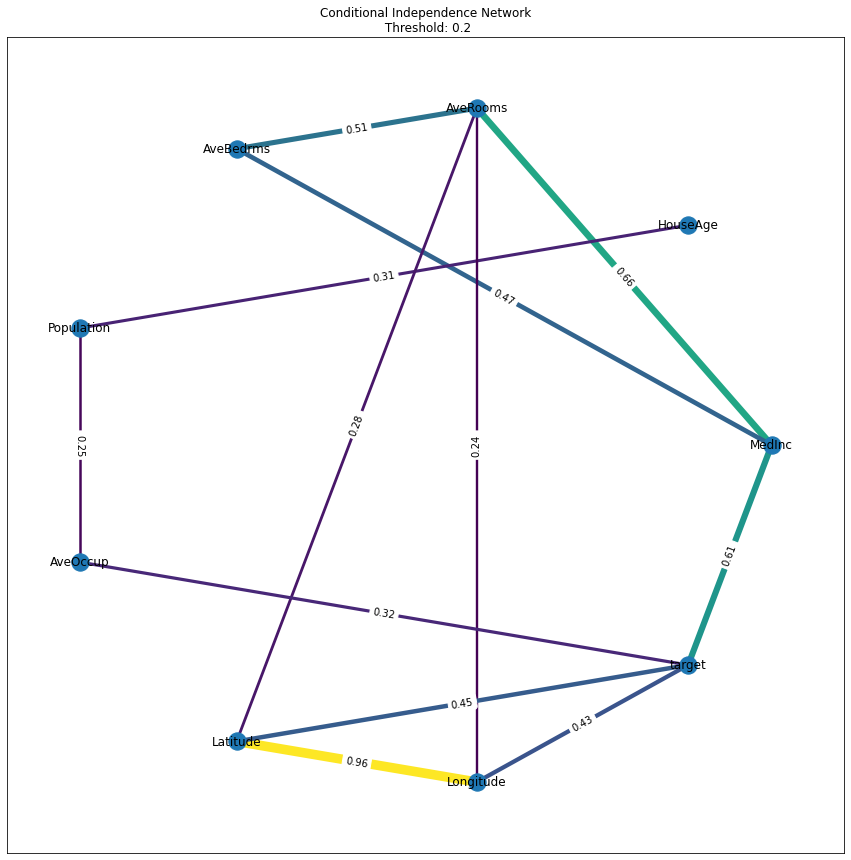

In [11]:
# low threshold induce less sparsity or low confidence in the degree of independence
model.plot_cond_ind_network(threshold=0.2)

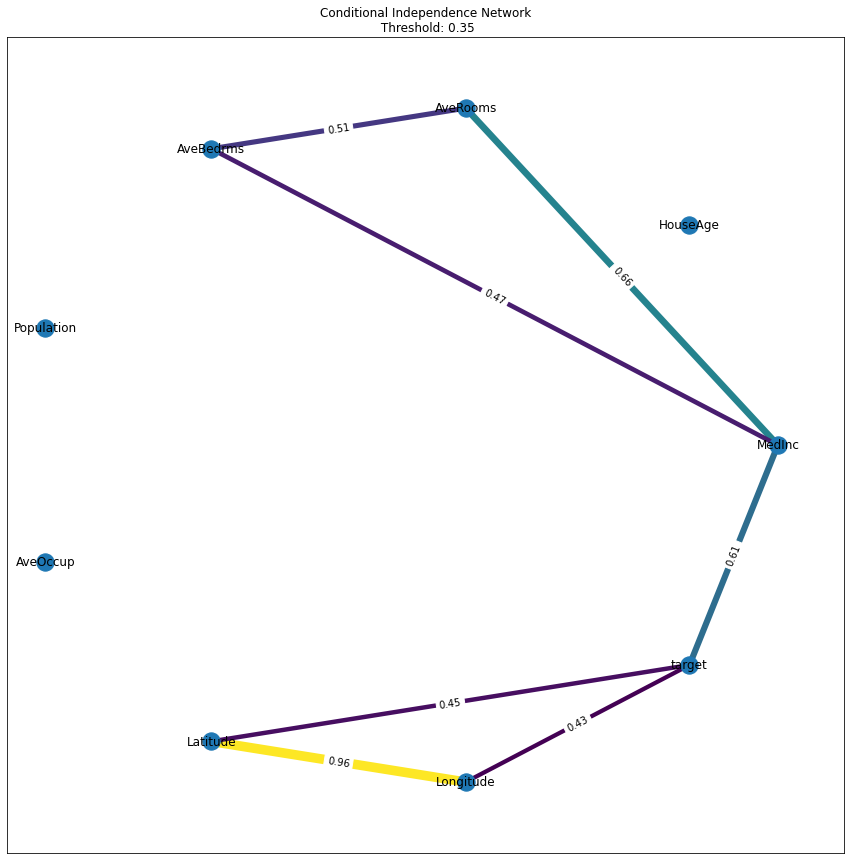

In [12]:
# higher threshold induce more sparsity or increases confidence in the degree of independence
model.plot_cond_ind_network(threshold=0.35)

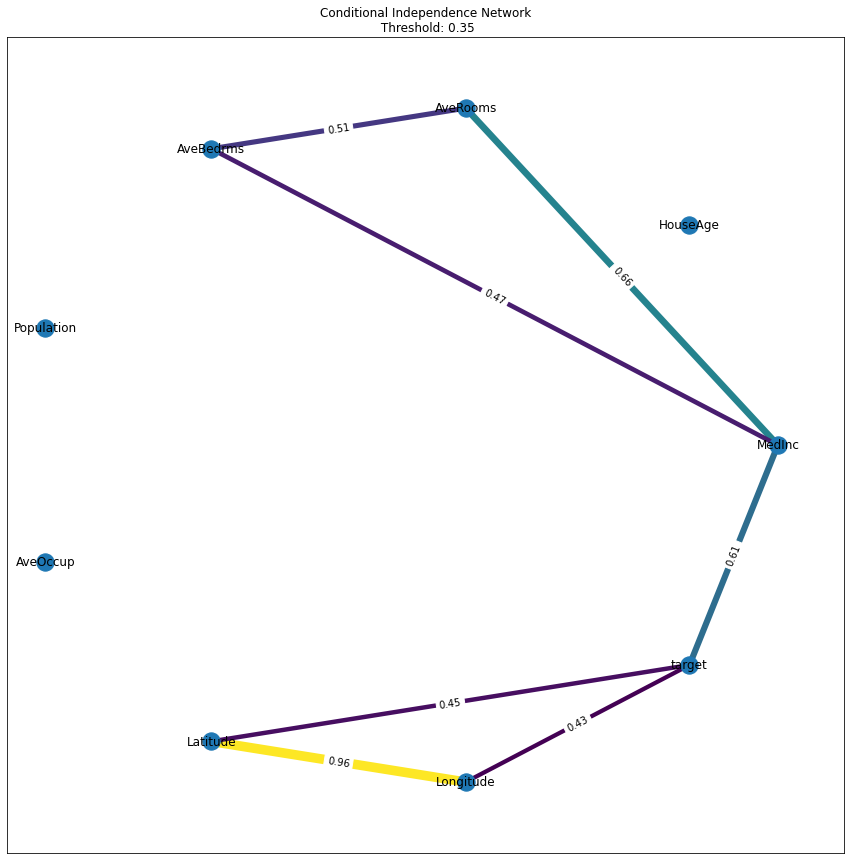

In [13]:
model.plot_cond_ind_network(threshold=0.35)

## Model with different covariance estimators and manifolds

In [14]:
from sklearn import covariance, manifold
alphas = np.logspace(-1,1,5).tolist()
edge_model = covariance.GraphicalLassoCV( assume_centered=True, n_refinements=10, max_iter=500)
# edge_model = covariance.MinCovDet(assume_centered=True)
# edge_model = covariance.LedoitWolf(assume_centered=True)
# edge_model = covariance.EmpiricalCovariance()


In [15]:
model_custom = PartialCorrelations(edge_model=edge_model)
model_custom.fit(X)

PartialCorrelations(edge_model=GraphicalLassoCV(assume_centered=True,
                                                max_iter=500,
                                                n_refinements=10))

In [16]:
model_custom.compute_cond_ind_matrix(threshold=0.3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,0,0,1,1,0,0,0,0,1
HouseAge,0,0,0,0,1,0,0,0,0
AveRooms,0,0,0,1,0,0,0,0,0
AveBedrms,0,0,0,0,0,0,0,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,1
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
target,0,0,0,0,0,0,0,0,0


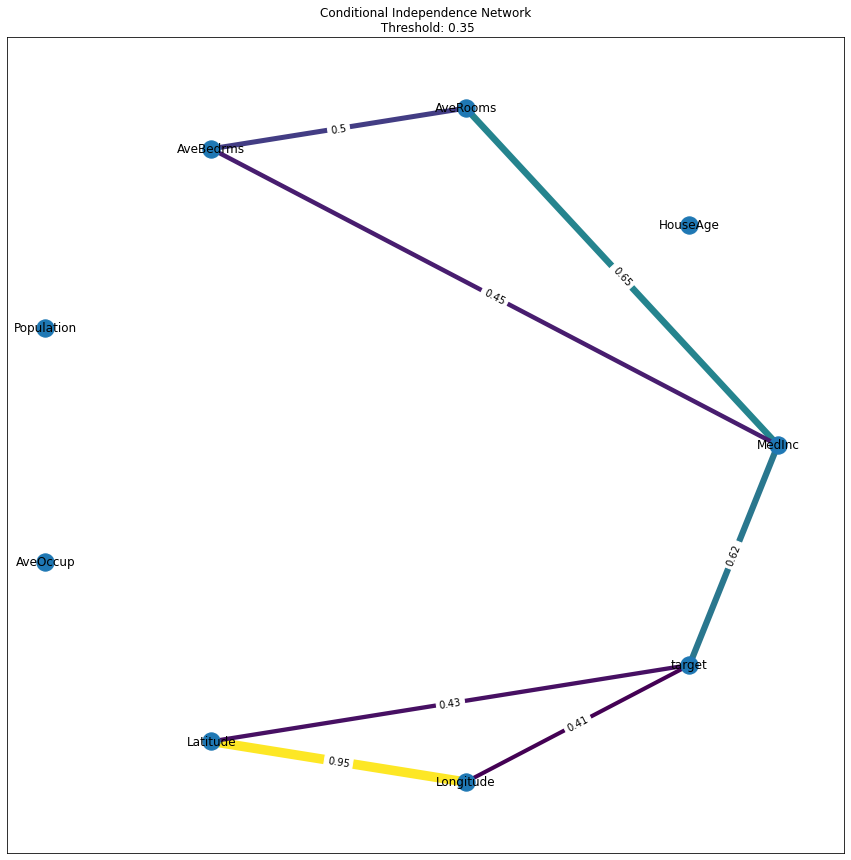

In [17]:
model_custom.plot_cond_ind_network(threshold=0.35)

# Diabetes Dataset

In [18]:
df = load_diabetes(return_X_y=False, as_frame=True)
df["data"]["target"] = df["target"]

In [19]:
X = df["data"].copy()
# X = (X-X.mean(axis=0))/X.std(axis=0)

In [20]:
names = X.columns.tolist()

In [21]:
# norm = QuantileTransformer(n_quantiles=10, output_distribution="normal")
norm = PowerTransformer(method='yeo-johnson', standardize=True)
X = pd.DataFrame(data=norm.fit_transform(X), columns=names)

In [22]:
model_2 = PartialCorrelations()
model_2.fit(X)

PartialCorrelations(edge_model=EmpiricalCovariance())

In [23]:
model_2.compute_cond_ind_matrix(threshold=0.1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,0,0,0,1,0,0,0,0,0,1,0
sex,0,0,0,1,0,0,0,0,0,0,1
bmi,0,0,0,1,0,0,0,0,0,1,1
bp,0,0,0,0,0,0,0,0,0,1,1
s1,0,0,0,0,0,1,1,1,1,0,0
s2,0,0,0,0,0,0,1,0,1,0,0
s3,0,0,0,0,0,0,0,1,1,0,0
s4,0,0,0,0,0,0,0,0,0,0,0
s5,0,0,0,0,0,0,0,0,0,0,1
s6,0,0,0,0,0,0,0,0,0,0,0


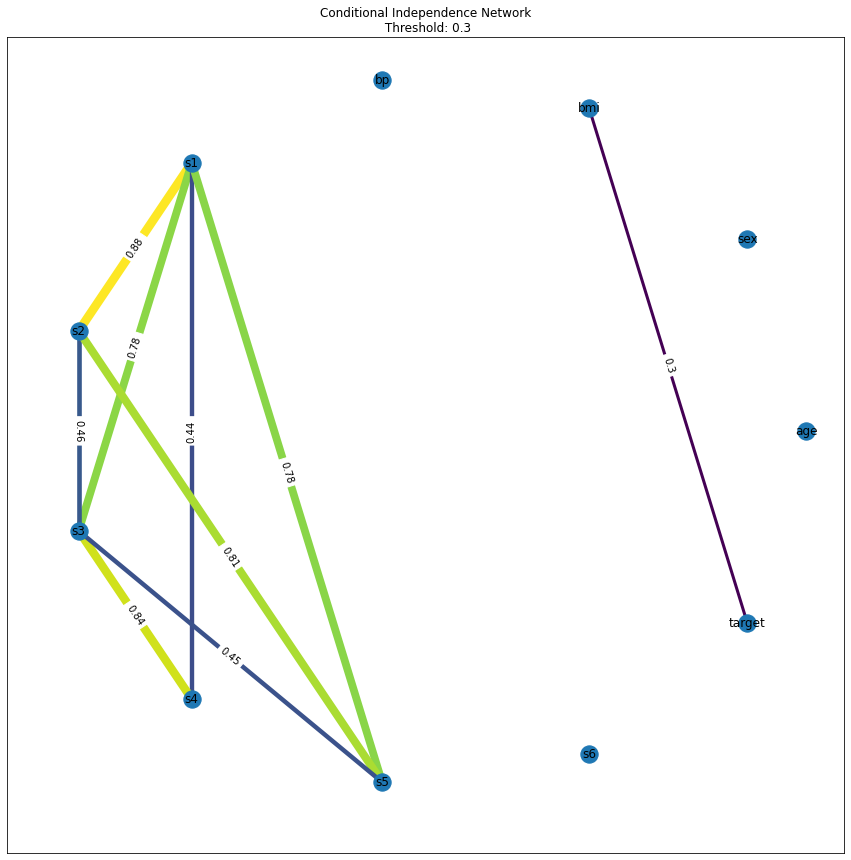

In [24]:
model_2.plot_cond_ind_network(threshold=0.3)

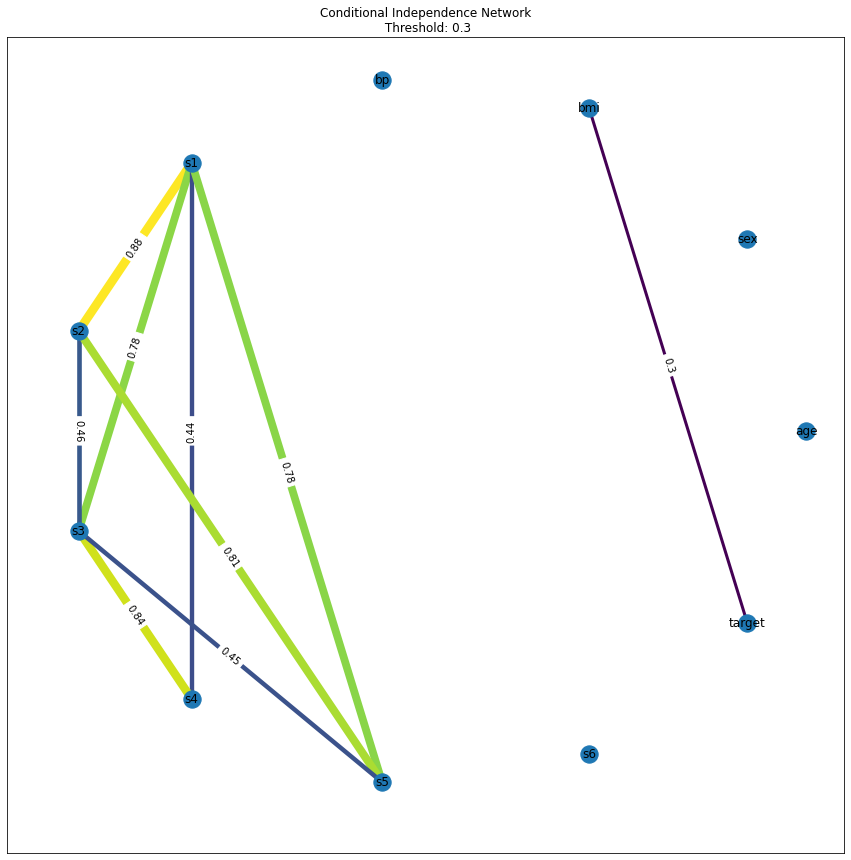

In [25]:
model_2.plot_cond_ind_network(threshold=0.3)